In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from mpl_toolkits import mplot3d
import math

# Funkcje celu

In [14]:
def rastrigin(x,y):
    return x**2 - 10*np.cos(2*math.pi*x) + 10 + y**2 - 10*np.cos(2*math.pi*y) + 10

def rosenbrock(x,y):
    return 100*(x**2 - y)**2 + (x - 1)**2

def sphere(x,y):
    return x**2 + y**2

name_func = {
    'Sphere': sphere,
    'Rosenbrock': rosenbrock,
    'Rastrigin': rastrigin
}

In [18]:
name = 'Rosenbrock'

f = name_func[name]

x = np.linspace(0, 2, 30)
y = np.linspace(0, 3, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

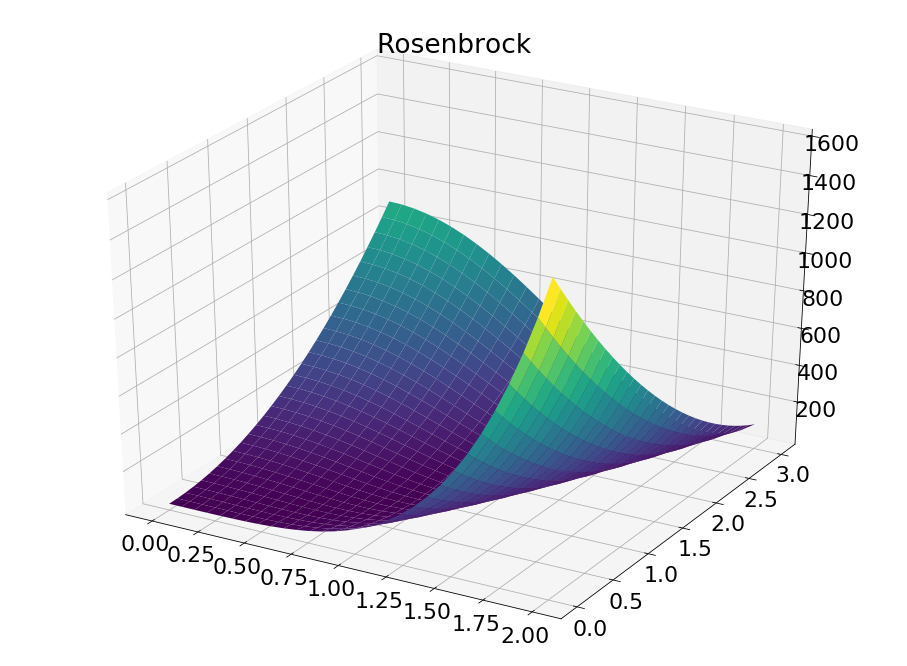

In [19]:
font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig = plt.figure(figsize=(16, 12))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title(name);
fig.savefig(f'figs\\{name}.png')

# Czas iteracji od 1 do 1000

In [45]:
# python dfs
py_cmaes = pd.read_csv("times_list_cmaes.csv")
py_de = pd.read_csv("times_list_de.csv")
py_des = pd.read_csv("times_list_des.csv")
py_dfs = [py_cmaes, py_de, py_des]

# r dfs
r_cmaes = pd.read_csv("cmaes_iter_time.csv")
r_de = pd.read_csv("de_iter_time.csv")
r_des = pd.read_csv("des_iter_time.csv")
r_dfs = [r_cmaes, r_de, r_des]

dfs = zip(py_dfs, r_dfs)

In [46]:
new_dfs = []
for df_pair in dfs:
    new_dfs.append(pd.concat([df_pair[0], df_pair[1]], axis=1))
    

In [47]:
alg_to_int = {'cmaes': 0,
             'de': 1,
             'des': 2}

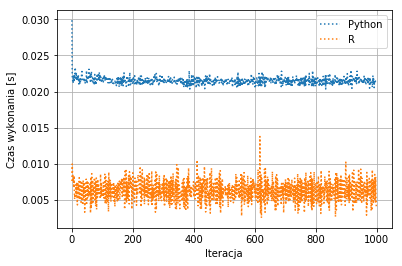

In [50]:
algorithm = 'des'
alg_id = alg_to_int[algorithm]

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Iteracja')
ax1.set_ylabel('Czas wykonania [s]')
ax1.plot(new_dfs[alg_id], ':')
ax1.grid()
ax1.legend(list(new_dfs[alg_id].columns))
fig1.savefig(f'figs\\eval_{algorithm}.png')

# Średni czas iteracji w zależności od wymiaru

In [40]:
# python dfs
py_cmaes = pd.read_csv("py_mean_time_per_dim_cmaes.csv",index_col=0)
py_de = pd.read_csv("py_mean_time_per_dim_de.csv",index_col=0)
py_des = pd.read_csv("py_mean_time_per_dim_des.csv",index_col=0)
py_dfs = [py_cmaes, py_de, py_des]

# r dfs
r_cmaes = pd.read_csv("r_mean_time_per_dim_cmaes.csv")
r_de = pd.read_csv("r_mean_time_per_dim_de.csv")
r_des = pd.read_csv("r_mean_time_per_dim_des.csv")
r_dfs = [r_cmaes, r_de, r_des]

dfs = zip(py_dfs, r_dfs)

In [41]:
new_dfs = []
for df_pair in dfs:
    new_dfs.append(df_pair[0].set_index('Dim').join(df_pair[1].set_index('Dim')))

In [42]:
alg_to_int = {'cmaes': 0,
             'de': 1,
             'des': 2}

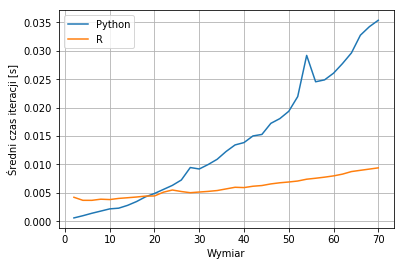

In [44]:
algorithm = 'des'
alg_id = alg_to_int[algorithm]

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Wymiar')
ax1.set_ylabel('Średni czas iteracji [s]')
ax1.plot(new_dfs[alg_id], '-')
ax1.grid()
ax1.legend(list(new_dfs[alg_id].columns))
fig1.savefig(f'figs\\iter_per_dim_{algorithm}.png')